# Machine-Learning

## Motivation, um den Lösungsweg zu optimieren

<div style="background-color: Cornsilk; padding: 5px 20px 20px">

In dem [Notebook](../Regression/01_RegressionOhneBias.ipynb) mussten wir während der Trainingsphase den Wert von `m` solange verändern, bis der Fehler möglichst gering war. Dabei wurde immer wieder die Vorhersagefunktion aktiviert und damit ein Mittelwert errechnet.

Die Frage stellt sich jetzt, ob es vielleicht möglich ist, in der Trainingsphase schneller das Minimum der Fehlerfunktion zu bestimmen.

<div style="background-color: Cornsilk; padding: 5px 20px 20px">

Wir lassen dazu einmal den Graphen zeichnen, der sich ergibt, wenn man für gewisse Werte von m den zugehörigen Fehler berechnet.

In [16]:
import numpy as np

In [17]:
def vorhersage (X,m):
    return X*m

In [18]:
def fehler (X, Y, m):
    return np.average ((vorhersage (X, m) - Y)**2)
# (Der Wert des Fehlers hängt tatsächlich nur von dem Wert von m ab,
# da X und Y - nach dem Einlesen der Daten - konstant sind!

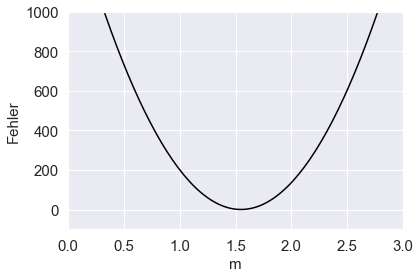

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

X, Y = np.loadtxt("../Daten/schuhe.txt", skiprows=1, unpack=True)

sns.set()  # Activate Seaborn

# Berechne den Fehler für m im Bereich [0 ... 3]
alleMs = np.linspace(-1.0, 4.0, 200)
alleFehler = [fehler(X, Y, m) for m in alleMs]

# Plot m gegen den Fehler
plt.axis([0, 3, -100, 1000])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("m", fontsize=15)
plt.ylabel("Fehler", fontsize=15)
plt.plot(alleMs, alleFehler, color="black")
plt.show ()

<div style="background-color: Cornsilk; padding: 5px 20px 20px">

In dem für m betrachteten Intervall [0, 3] scheint es doch einfach zu sein, das Minimum des Fehlers zu finden. 

<div style="background-color: lightblue; padding: 5px 20px 20px">

### Aufgabe: 
    
Suche zu der Funktion mit dem Term $2x^2 + 3x + 4$ eine Stelle mit möglichst kleintem Wert, indem du in der folgenden Eingabezelle verschiedene Werte berechnen lässt:

In [21]:
def f(x):
    return 2*x**2 + 3*x + 4

# hier bitte probieren!

<div style="background-color: Cornsilk; padding: 5px 20px 20px">

Um das lokale Minimum systematischer zu finden, stellen wir folgende Überlegungen an:

## Steigung; ein wenig Analysis zur Wiederholung

<div style="background-color: Cornsilk; padding: 5px 20px 20px">

Die Mathematik bietet folgendes an:
> Hat man eine differenzierbare Funktion $f$, so ist $f'(x)$ die Steigung der Tangente an der Stelle `x`

<div style="background-color: Cornsilk; padding: 5px 20px 20px">

Auch wenn du mit der Begrifflichkeit noch nicht vertraut bist:

> Man nennt $f'(x)$ die ***Ableitung*** einer Funktion $f$.

Das hat folgenden Sinn:

> Die Ableitung $f'(x)$ einer Funktion $f$ ist ein Maß für die ***Steilheit*** des Graphen der Funktion.

In [5]:
def ableitung(term):
    term_d = diff (term, x)
    return term_d

<div style="background-color: Cornsilk; padding: 5px 20px 20px">

Das kann man visualisieren.

In [7]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

x=Symbol('x')

<div style="background-color: Cornsilk; padding: 5px 20px 20px">

Dargestellt ist in BLAU der Graph einer Funktion sowie eine Gerade, die man als ***Tangente an $f$ an der Stelle $s$*** bezeichnet.

Die Steilheit der Funktion, also die Steilheit dieser Tangente, wird berechnet mit Hilfe der oben beschriebenen Ableitung.

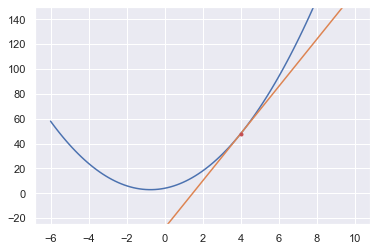

Die Steilheit an der Stelle 4 ist 19


In [24]:
term = 2*x**2 + 3*x + 4
s = 4

tt = ableitung (term)

f = lambdify(x, term)
fs = lambdify(x, tt)

X = np.linspace(-6, 10, 100)
Y = f(X)
Z = fs(X)

T = fs(s) * (X-s) + f(s)


p1 = plt.plot (X,Y)
#p2 = plt.plot (X,Z)
p3 = plt.plot (X,T)

p4 = plt.plot (s,f(s),"r.")
plt.ylim(-25, 150)
plt.show ()
print ("Die Steilheit an der Stelle", s, "ist", fs(s))


<div style="background-color: lightblue; padding: 5px 20px 20px">

### Aufgabe:

Probiere in der obigen Eingabezelle mit unterschiedlichen Werten für $s$ und/oder mit anderen Termen. Beobachte dabei genau die Steilheit sowie den Wert der Ableitung, der unter der Graphik angezeigt wird.

Beantworte auch die Frage:
- Für welche Werte von $s$  ist die Steilheit positiv, für welche negativ?

Suche auch einen Wert für $s$, so dass die Steilheit einen Wert hat, der möglichst nahe bei Null liegt.

Eine wichtige Aufgabe der Analysis besteht z.B. darin, die lokalen Extrema einer Funktion zu finden.

Die Analysis sagt uns dazu:

> Ist $f$ eine differenzierbare Funktion. Wenn der Punkt $x_0, f(x_0)$ ein lokaler Extrempunkt ist, dann ist $f'(x_0) = 0$

Also macht es Sinn, sich auf die Suche nach den Nullstellen von $f$ zu begeben.

Doch ist die Gleichung $f'(x) = 0$ nicht immer algebraisch einfach zu lösen. Dann hilft folgende Überlegung, die wir an einem Beispiel einer quadratischen Funktion demonstrieren wollen. 

Eine quadratische Funktion, die nach oben geöffnet ist, hat immer ein lokales Minimum. Das wollen wir finden, ohne die Nullstelle der Ableitung algebraisch zu suchen. 

*Die algebraische Suche ist natürlich eigentlich sehr einfach, da es sich bei der Ableitung einer quadratischen Funktion um eine lineare Funktion handelt; doch wir ignorieren das hier einmal, um das Prinzip zu verdeutlichen!*

Um also das lokale Minumum zu finden, starten wir an einer beliebigen Stelle $s$ und berechnen dort den Wert der Ableitung $a = f'(s)$

Anschaulich ist dann klar:
- Ist $a=0$, so hat man das Minumum gefunden.
  - Da hier mit (ungenauen) Fließkommazahlen gearbeitet wird, wird man dies umformulieren zu $|a| < \varepsilon$ für ein geeignetes $\varepsilon$.
- Ist $a > 0$, dann muss man $s$ verkleinern. Dabei verkleinert man $s$ umso mehr, je größer $a$ ist.
- Ist dagegen $a < 0$, muss man $s$ vergrößern, und zwar umso mehr, je kleiner $a$ ist. 

Also kann man $s$ proportional zu $a$ vergrößern oder verkleinern. Das führt zu der Iteration 
$(s \leftarrow s - a * d)$ mit einem Proportionalitätsfaktor $d$.

Start bei x = 4.000000
Nach  123 Iterationen => Funktionswert: 3.1206; Steigung: 0.0010 
Tiefpunkt bei ca. 0.535317


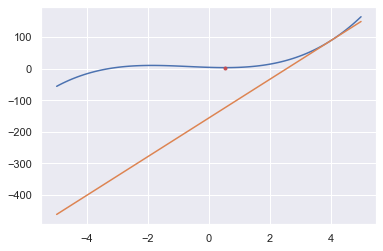

In [22]:
term = x**3 + 2*x**2 - 3*x + 4
p_start = 4

tt = ableitung (term)

f = lambdify(x, term)
fs = lambdify(x, tt)

X = np.linspace(-5, 5, 100)
Y = f(X)
Z = fs(X)

p = p_start
T = fs(p) * (X-p) + f(p)


p1 = plt.plot (X,Y)
#p2 = plt.plot (X,Z)
p3 = plt.plot (X,T)

i = 0
abl = fs(p)
while (i < 1000) and (abs (abl) > 0.001):
    # print("Iteration %4d => f: %.4f fs: %.4f " % (i, f(p), fs(p)))
    p -= fs(p) * 0.01
    abl = fs(p)
    i += 1

print ("Start bei x = %4f" % p_start)
print("Nach %4d Iterationen => Funktionswert: %.4f; Steigung: %.4f " % (i, f(p), fs(p)))
if (i > 1000):
    print ("Keine Lösung gefunden!")
else:    
    print ("Tiefpunkt bei ca. %4f" % p)

p4 = plt.plot (p,f(p),"r.")
plt.show ()


## Überwachtes Lernen; Gradienten

Wir benutzen hier nochmals die Fragestellung aus dem [Notebook](../Regression/01_RegressionOhneBias.ipynb). 
Dort haben wir mit Hilfe von Trainingsläufen eine Lösung gefunden, indem der Fehler schrittweise verkleinert wurde.


Die notwendigen Python-Bibliotheken sowie die Definitionen nochmals hier:

In [10]:
def gradient(X, Y, w):
    return 2 * np.average(X * (vorhersage(X, w) - Y))

In [11]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        print("Iteration %4d => Loss: %.10f" % (i, fehler(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w

In [12]:
X, Y = np.loadtxt("../Daten/schuhe.txt", skiprows=1, unpack=True)
w = train(X, Y, iterations=100, lr=0.001)
print("\nw=%.10f" % w)

Iteration    0 => Loss: 1596.8000000000
Iteration    1 => Loss: 176.5035494502
Iteration    2 => Loss: 19.7395855752
Iteration    3 => Loss: 2.4369017867
Iteration    4 => Loss: 0.5271333751
Iteration    5 => Loss: 0.3163443766
Iteration    6 => Loss: 0.2930787275
Iteration    7 => Loss: 0.2905108020
Iteration    8 => Loss: 0.2902273695
Iteration    9 => Loss: 0.2901960859
Iteration   10 => Loss: 0.2901926330
Iteration   11 => Loss: 0.2901922519
Iteration   12 => Loss: 0.2901922098
Iteration   13 => Loss: 0.2901922052
Iteration   14 => Loss: 0.2901922047
Iteration   15 => Loss: 0.2901922046
Iteration   16 => Loss: 0.2901922046
Iteration   17 => Loss: 0.2901922046
Iteration   18 => Loss: 0.2901922046
Iteration   19 => Loss: 0.2901922046
Iteration   20 => Loss: 0.2901922046
Iteration   21 => Loss: 0.2901922046
Iteration   22 => Loss: 0.2901922046
Iteration   23 => Loss: 0.2901922046
Iteration   24 => Loss: 0.2901922046
Iteration   25 => Loss: 0.2901922046
Iteration   26 => Loss: 0.290192

Zum Testen wird die Fehler-Funktion (in Abhängigkeit von m):

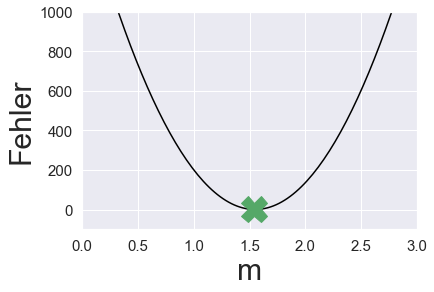

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

X, Y = np.loadtxt("../Daten/schuhe.txt", skiprows=1, unpack=True)

sns.set()  # Activate Seaborn

# Berechne den Fehler für m im Bereich [-1 ... 4]
alleMs = np.linspace(-1.0, 4.0, 200)
alleFehler = [fehler(X, Y, m) for m in alleMs]

# Plot m gegen Fehler
plt.axis([0, 3, -100, 1000])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("m", fontsize=30)
plt.ylabel("Fehler", fontsize=30)
plt.plot(alleMs, alleFehler, color="black")

# Put a green cross on the minimum loss
min_index = np.argmin(alleFehler)
plt.plot(alleMs[min_index], alleFehler[min_index], "gX", markersize=26)

plt.show()